In [103]:
import numpy as np #for array based operations
import pandas as pd #Handling dataset and organizing the data
import matplotlib.pyplot as plt #for visualizing 
import seaborn as sns #for visualizing

## About the dataset
This dataset offers an in-depth glimpse into a series of credit card transactions conducted in India, offering a thorough understanding of the spending patterns prevalent among Indians nationwide. Covering diverse aspects such as the gender of the cardholder, the type of card used, predominant spending cities, and the nature of expenses incurred, this dataset presents a holistic view of India's current expenditure landscape. With its rich assortment of variables, researchers have the opportunity to unearth underlying trends in consumer spending and discover intriguing correlations among data points, offering valuable business insights. Whether delving into customer preferences or exploring objective data analysis methodologies, this dataset promises to reveal unexpected insights that exceed initial expectations.

In [104]:
#importing data set
df=pd.read_csv('Credit card transactions - India - Simple.csv')

In [105]:
#Let us observe how this data set looks
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


There a column index which is not necessary and consumes space.<br> Let us drop it.

In [106]:
df=df.drop(columns='index',axis=0) # axis=0 for column removal

In [107]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


Let us look information and description of the following dataset

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [109]:
df.describe()

,Amount
count,26052.000000
mean,156411.537425
std,103063.254287
min,1005.000000
25%,77120.250000
50%,153106.500000
75%,228050.000000
max,998077.000000


There no null values in the data. But we can observe that after every city name it is written ',India'. Let us drop it for convienient operations

In [110]:
df['City']=df['City'].str.replace(', India','')
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,Delhi,29-Oct-14,Gold,Bills,F,82475
1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555
2,Bengaluru,27-Aug-14,Silver,Bills,F,101738
3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424
4,Bengaluru,5-May-15,Gold,Bills,F,171574


Let us change gender into Male and Female for better presentation.

In [111]:
def Fullstring(g):
    if g=='F':
        return 'Female'
    else:
        return 'Male'

In [112]:
df['Gender']=np.vectorize(Fullstring)(df['Gender'])

In [113]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,Delhi,29-Oct-14,Gold,Bills,Female,82475
1,Greater Mumbai,22-Aug-14,Platinum,Bills,Female,32555
2,Bengaluru,27-Aug-14,Silver,Bills,Female,101738
3,Greater Mumbai,12-Apr-14,Signature,Bills,Female,123424
4,Bengaluru,5-May-15,Gold,Bills,Female,171574


## Proportions of Genders

Let us see in which proportions men and women  are divided.

In [114]:
x=df.value_counts('Gender').index
y=df.value_counts('Gender').values
x,y

(Index(['Female', 'Male'], dtype='object', name='Gender'),
 array([13680, 12372], dtype=int64))

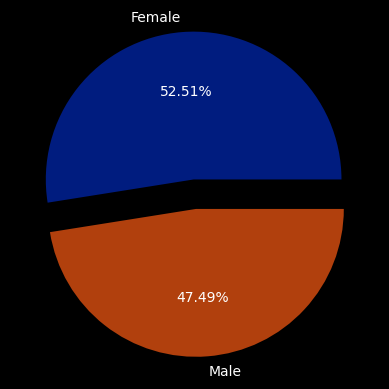

In [115]:
plt.style.use('dark_background')
plt.pie(y,labels=x,colors=sns.color_palette('dark'),explode=[0.1,0.1],autopct='%.2f%%')
plt.show()

## Spend Analysis of Men

Let us explore how men spend their money


In [116]:
male=df[df['Gender']=='Male'][['Exp Type','Card Type']]

In [117]:
labels=male.value_counts('Exp Type').index
x=male.value_counts('Exp Type').values
male.value_counts('Exp Type')

Exp Type
Fuel             2640
Food             2451
Entertainment    2378
Grocery          2326
Bills            2218
Travel            359
Name: count, dtype: int64

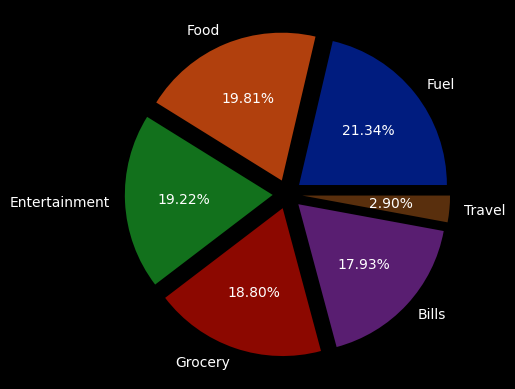

In [118]:
plt.style.use('dark_background')
plt.pie(x,labels=labels,colors=sns.color_palette('dark'),explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%.2f%%')
plt.show()

## Spend Analysis of Women
Let us explore how Women spend their money



In [119]:
female=df[df['Gender']=='Female'][['Exp Type','Card Type']]

In [120]:
labels=female.value_counts('Exp Type').index
x=female.value_counts('Exp Type').values
female.value_counts('Exp Type')

Exp Type
Food             3012
Bills            2860
Fuel             2617
Grocery          2428
Entertainment    2384
Travel            379
Name: count, dtype: int64

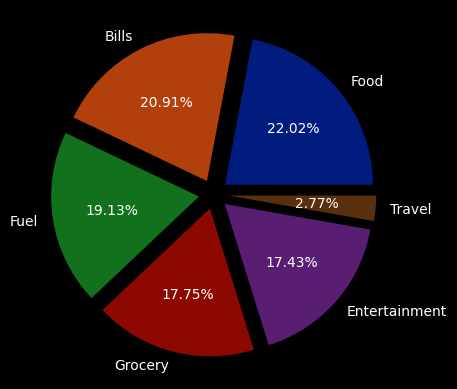

In [121]:
plt.style.use('dark_background')
plt.pie(x,labels=labels,colors=sns.color_palette('dark'),explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%.2f%%')
plt.show()

## Explore the great cities
Let have a look on the cities like Bengaluru, Greater Mumbai, Ahmedabad, Delhi, Hyderabad, Chennai, Kolkata

In [122]:
y=['Bengaluru','Greater Mumbai','Ahmedabad','Delhi','Hyderabad','Chennai','Kolkata']
y

['Bengaluru',
 'Greater Mumbai',
 'Ahmedabad',
 'Delhi',
 'Hyderabad',
 'Chennai',
 'Kolkata']

In [123]:
def ismega(c):
    if c in y:
        return True
    else:
        return False

In [124]:
truth=np.vectorize(ismega)(df['City'])
truth

array([ True,  True,  True, ...,  True, False,  True])

In [125]:
megacities=df[truth]

In [126]:
megacities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16349 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       16349 non-null  object
 1   Date       16349 non-null  object
 2   Card Type  16349 non-null  object
 3   Exp Type   16349 non-null  object
 4   Gender     16349 non-null  object
 5   Amount     16349 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 894.1+ KB


Expenditure proportions in these cities

In [127]:
x=megacities.value_counts('Exp Type').index
y=megacities.value_counts('Exp Type').values

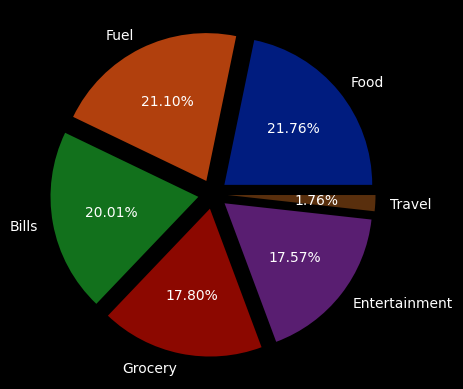

In [128]:
plt.pie(y,labels=x,colors=sns.color_palette('dark'),explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%.2f%%')
plt.show()

Average expenditure in each city


In [129]:
avg=megacities.drop(columns=['Date','Gender','Card Type'])
avg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16349 entries, 0 to 26051
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   City      16349 non-null  object
 1   Exp Type  16349 non-null  object
 2   Amount    16349 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 510.9+ KB


In [130]:
x=avg.groupby(['City','Exp Type']).mean().round(2)

In [131]:
x

Amount
City           Exp Type                
Ahmedabad      Bills          207778.98
               Entertainment  156756.05
               Food           146650.01
               Fuel           153289.46
               Grocery        151330.71
Bengaluru      Bills          192516.22
               Entertainment  153944.04
               Food           153793.07
               Fuel           151367.14
               Grocery        152790.20
Chennai        Bills          146859.64
               Entertainment  145118.39
               Food           139998.59
               Fuel           144114.50
               Grocery        155501.24
               Travel         160832.07
Delhi          Bills          200071.35
               Entertainment  148624.56
               Food           153228.10
               Fuel           147505.04
               Grocery        149623.88
Greater Mumbai Bills          210941.73
               Entertainment  155695.00
               Food           152903.24
               Fuel           152538.53
               Grocery        151314.69
Hyderabad      Bills          148231.51
               Entertainment  130811.31
               Food           142744.17
               Fuel           144388.91
               Grocery        160922.32
               Travel         148889.40
Kolkata        Bills          144580.52
               Entertainment  151662.01
               Food           151728.94
               Fuel           151933.25
               Grocery        153862.22
               Travel         139822.47

In [132]:
x=x.reset_index()

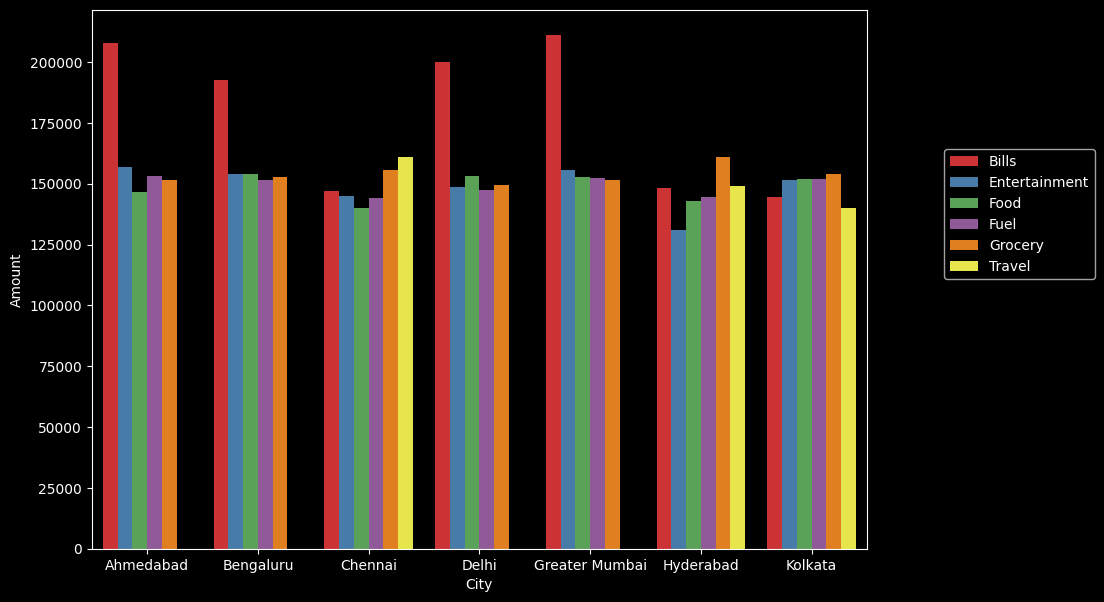

In [133]:
plt.figure(figsize=(10,7))
sns.barplot(data=x,x="City",y='Amount',hue='Exp Type',palette='Set1')
plt.legend(loc=(1.1,0.5))


Let us observe each city individually

In [134]:
def city_stats(name):
    ahm=x[x['City']==name][['Exp Type','Amount']]
    plt.figure(figsize=(10,7))
    ax=sns.barplot(data=ahm,x="Exp Type",y='Amount',color='brown')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    plt.title(name)
    plt.show()

1. Mumbai

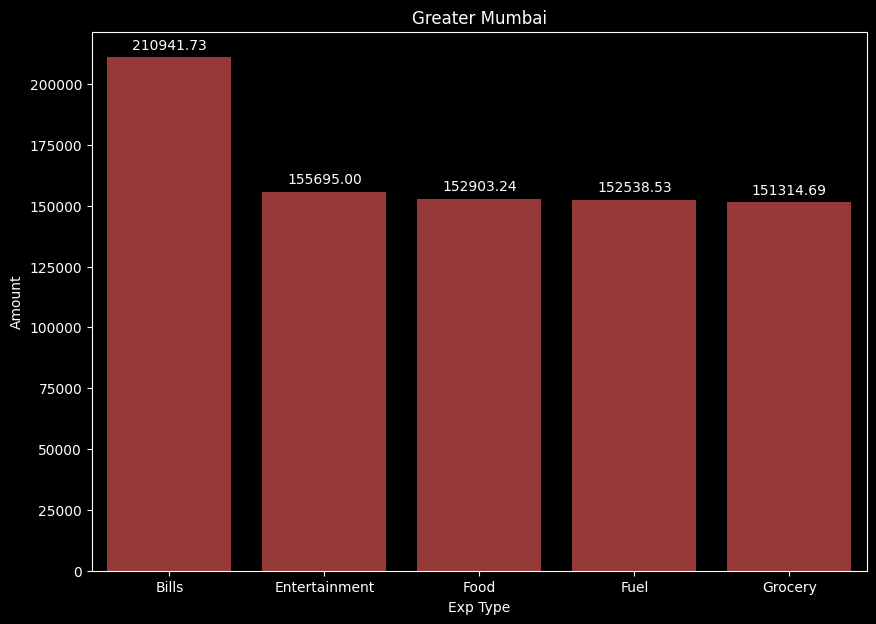

In [135]:
city_stats('Greater Mumbai')

2. Delhi

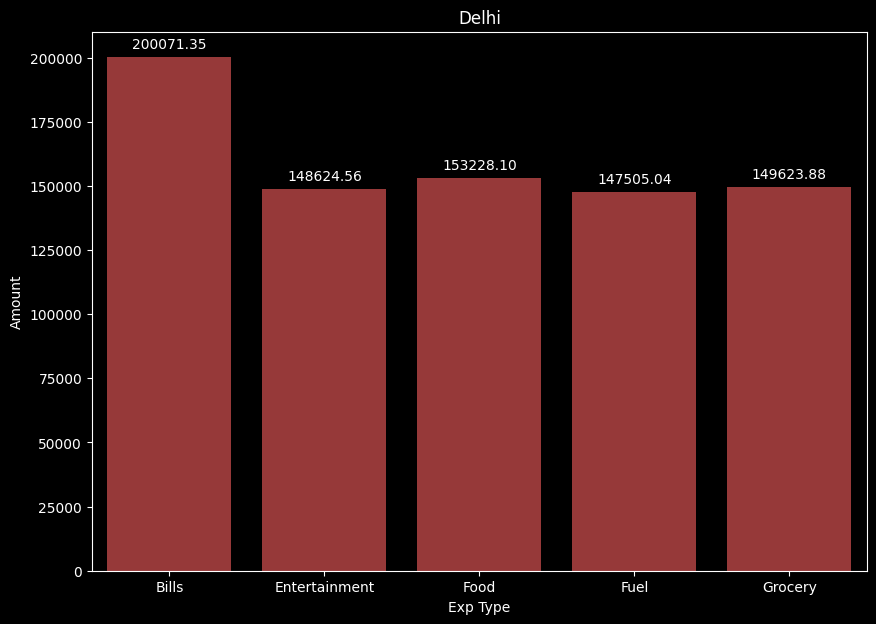

In [136]:
city_stats('Delhi')

3. Ahmedabad

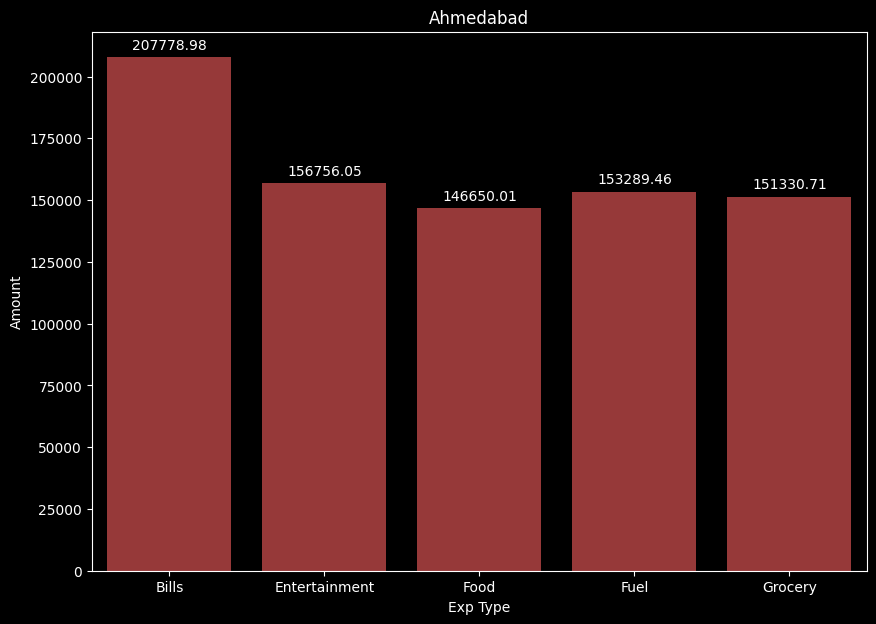

In [137]:
city_stats('Ahmedabad')

4. Kolkata

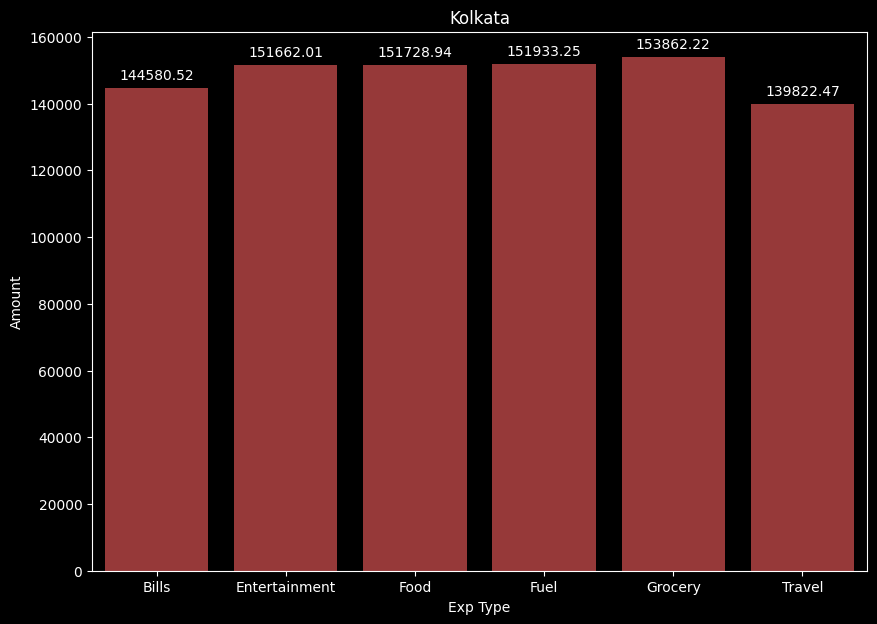

In [138]:
city_stats('Kolkata')

5. Bengaluru

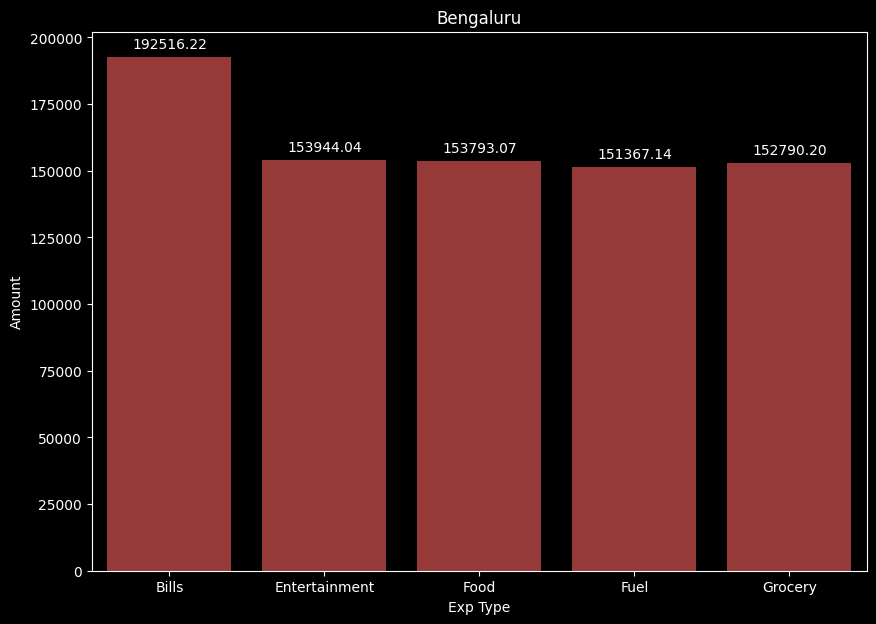

In [139]:
city_stats('Bengaluru')

6. Hyderabad

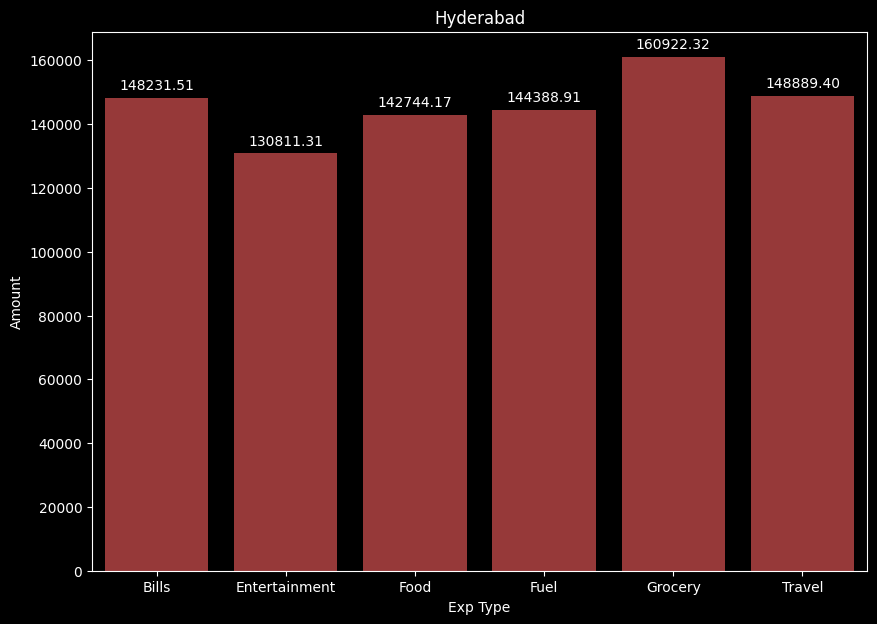

In [140]:
city_stats('Hyderabad')

7. Chennai

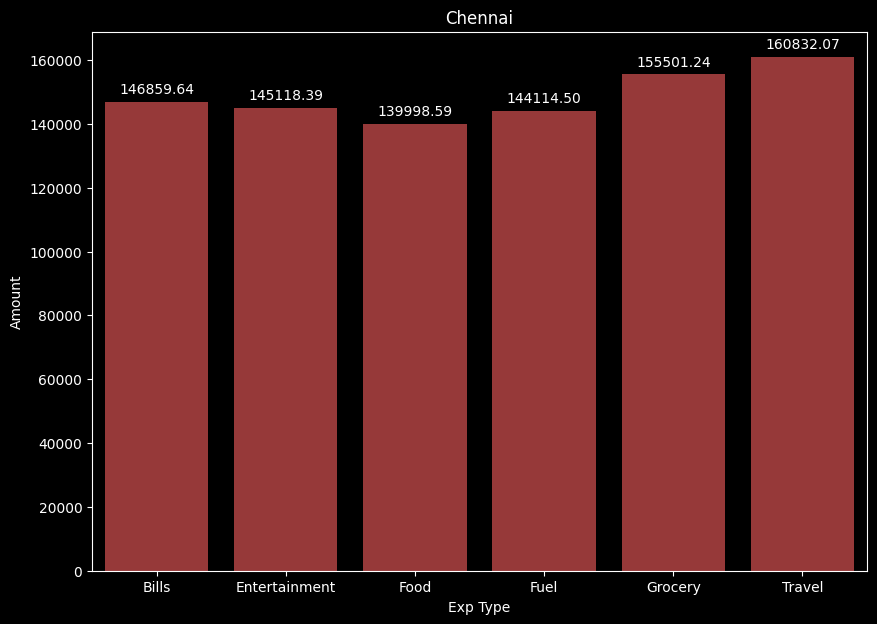

In [141]:
city_stats('Chennai')

Let us now find out average expenditures in each city

In [142]:
x=avg.drop(columns='Exp Type',axis=0)

In [143]:
x=x.groupby('City').mean().round(2)

In [144]:
x=x.reset_index()
x

,City,Amount
0,Ahmedabad,162645.18
1,Bengaluru,161128.02
2,Chennai,148230.75
3,Delhi,159945.21
4,Greater Mumbai,165116.37
5,Hyderabad,146037.60
6,Kolkata,149375.09


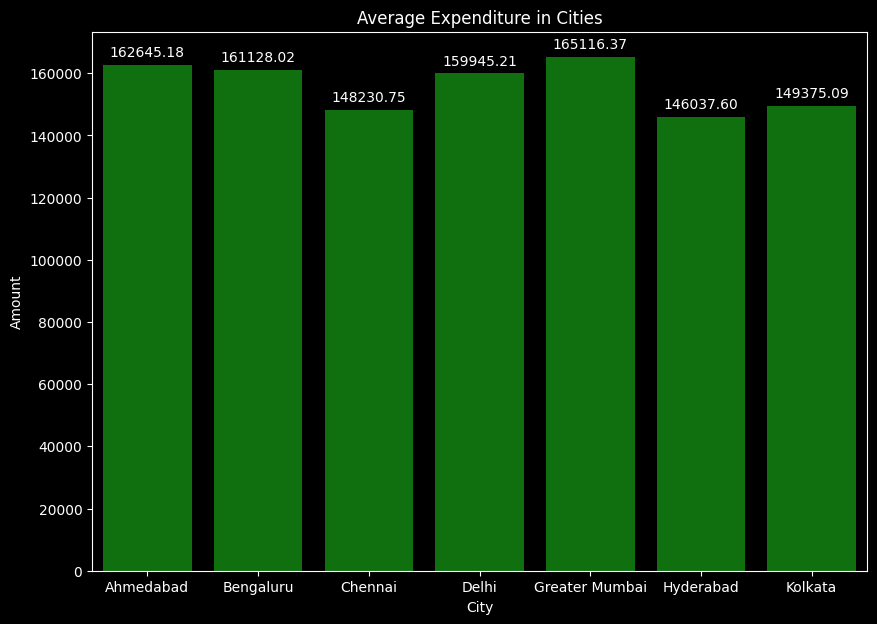

In [147]:

plt.figure(figsize=(10,7))
ax=sns.barplot(data=x,x="City",y='Amount',color='green')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Average Expenditure in Cities')
plt.show()

## Observations
1. Male and Female users constitute in the proportions of 47.49 and 52.51
2. Majority of expenditure of men is on fuel and of women is on food.
3. Both Men and Women spends least on Travel.
4. In cities like Bengaluru, Greater Mumbai, Ahmedabad, Delhi, Hyderabad, Chennai, Kolkata major expenditure is on food and spent less to travel
5. Mumbai is an expensive city to live in and Hyderabad is affordable relatively.